# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from MetabolomicsPaper.GeneralHelperFunctions import *
curr_dir = '/home/noamba/Analyses/Noamba/Metabolon/TwinsUK2/Analysis/'
figures_dir = '/home/noamba/Analyses/Noamba/Metabolon/Paper_v6/Figure2'
make_dir_if_not_exists(curr_dir)
make_dir_if_not_exists(figures_dir)
os.chdir(curr_dir)

/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Functions

In [2]:
def compute_cumulative_replication(results, replication_p, multiple_hypothesis_correction_func='FDR', r2_col='explained_variance_score',
                                   multiple_hypothesis_correction_th=0.05, plot=False, ax=None, return_ax=False):
    df = pd.concat((results, replication_p), axis=1).copy()
    df = df.sort_values(r2_col, ascending=False)
    df['count'] = range(1, df.shape[0]+1, 1)
    if multiple_hypothesis_correction_func == 'FDR':
        df['q'] = fdr_correction(df[replication_p.name])[1]
    elif multiple_hypothesis_correction_func == 'Bonferroni':
        df['q'] = df[replication_p.name] / df.shape[0]
    df['pass'] = df['q'] <= multiple_hypothesis_correction_th
    df['cumulative'] = [df.iloc[:i]['pass'].sum() for i in range(1, df.shape[0]+1)]
    df['percent replicated'] = 100*(df['cumulative'] / df['count'])
    if plot:
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(7, 5))
        ax.plot(df[results.name], df['percent replicated'], 'o--', color='dodgerblue', alpha=0.5)
        ax2 = ax.twinx()
        ax2.plot(df[results.name], df['count'], 'o--', color='tomato', alpha=0.5)
        ax.tick_params(labelsize=15)
        ax2.tick_params(labelsize=15)
        ax.set_ylabel('Percent replicated (%s<%0.1g)'%(multiple_hypothesis_correction_func, multiple_hypothesis_correction_th), 
                      fontsize=20, color='dodgerblue')
        ax2.set_ylabel('Number of replicated items', 
                      fontsize=20, color='tomato')
        ax.set_xlabel('Predicted-Real $R^2$ (PNP)', fontsize=20)
        if return_ax:
            return ax
        fig.tight_layout()
        plt.savefig('Real-Predicted_cumulative_twinsuk_all_log10P_%s%0.1g_above_r2%0.1g.png'%(multiple_hypothesis_correction_func, 
                                                                                              multiple_hypothesis_correction_th, r2_th), dpi=500)
    return df

# Load results

In [3]:
twinsuk_25 = pd.read_csv('../Results_TwinsUK_25.csv', index_col=0)
twinsuk_all = pd.read_csv('../Results_TwinsUK_All.csv', index_col=0)

In [4]:
copenhagen_results = pd.read_csv('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/Copenhagen/Copenhagen_WP2.2_replication_results.csv', index_col=0)

In [5]:
mb_all = pd.read_csv('../../technical_noise/RSCV/LightGBM/metabolomics_MB_daphna_LONG5_S/results.csv', index_col=0)

In [6]:
# mb_all['r2'] = mb_all['pearson_r']**2
mb_all['r2'] = mb_all['Coefficient_of_determination']

mb_all.sort_values('r2').tail(50)

,Size,Coefficient_of_determination,explained_variance_score,pearson_r,pearson_p,spearman_r,spearman_p,r2
X - 12329,474.0,0.177122,0.177135,0.424103,4.076634e-22,0.424825,3.412021e-22,0.177122
X - 12306,474.0,0.177790,0.178030,0.421950,6.917158e-22,0.411032,9.522912e-21,0.177790
100002049,474.0,0.178167,0.178180,0.422274,6.389581e-22,0.426790,2.096445e-22,0.178167
100004318,474.0,0.180022,0.180046,0.424602,3.605298e-22,0.423198,5.094039e-22,0.180022
X - 17354,474.0,0.180885,0.180897,0.425571,2.836841e-22,0.416030,2.901584e-21,0.180885
100001083,474.0,0.184584,0.184585,0.429636,1.029834e-22,0.443583,2.862877e-24,0.184584
100002021,474.0,0.190015,0.190037,0.435933,2.085591e-23,0.438730,1.014990e-23,0.190015
100004111,474.0,0.195939,0.196318,0.445428,1.760186e-24,0.420312,1.031431e-21,0.195939
X - 12230,474.0,0.198146,0.198307,0.445452,1.749008e-24,0.440583,6.275062e-24,0.198146
100002488,474.0,0.198618,0.198686,0.447047,1.145675e-24,0.403553,5.435224e-20,0.198618


In [7]:
pnp_results = pd.read_csv('../../technical_noise/RSCV/LightGBM/metabolomics_MB_daphna_LONG5_S/results.csv', index_col=0)

In [12]:
overlapping_metabs = set(pnp_results.index).intersection(set(twinsuk_all.index))

In [13]:
overlapping_metabs_copenhagen = set(pnp_results.index).intersection(set(copenhagen_results.index))

# plot

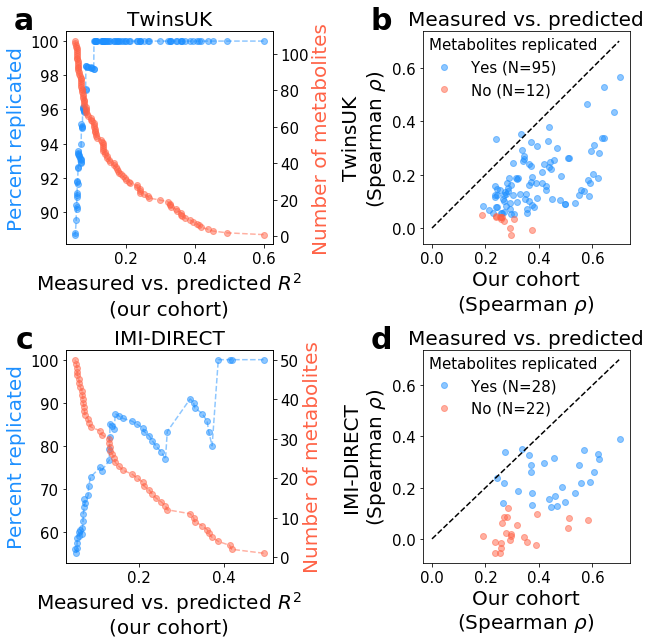

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))


r2_th = 0.1
r2_col = 'explained_variance_score' #'explained_variance_score'
r_col = 'spearman_r'
p_col = 'spearman_p'
r2_th = 0.05


ax = axes[0, 1]
df = compute_cumulative_replication(pnp_results.loc[overlapping_metabs].loc[(pnp_results.loc[overlapping_metabs, r2_col] > r2_th), [r_col, r2_col]],
                              twinsuk_all.loc[overlapping_metabs].loc[(pnp_results.loc[overlapping_metabs, r2_col] > r2_th), p_col],
                              plot=False, multiple_hypothesis_correction_th=0.1)
df['twinsuk_r'] = twinsuk_all.loc[df.index, r_col]
df[['explained_variance_score', 'spearman_r', 'twinsuk_r', 'spearman_p', 'q', 'pass']].rename(columns={'spearman_r': 'Spearman rho (our cohort)', 'twinsuk_r': 'Spearman rho (TwinsUK cohort)', 
                                                                                                                                                                   'spearman_p': 'Spearman p-value (TwinsUK cohort)', 'q': 'Spearman q-value (TwinsUK cohort)',
                                                                                                                                                                    'explained_variance_score': 'explained variance (our cohort)'})\
                                                                                                                                    .to_csv(os.path.join(figures_dir, 'twinsuk_replications.csv'))

ax.plot(df[df['pass'] == True][r_col], df[df['pass'] == True]['twinsuk_r'], 'o', alpha=0.5, 
        color='dodgerblue', label='Yes (N=%0.1d)'%(df['pass'].sum()))
ax.plot(df[df['pass'] == False][r_col], df[df['pass'] == False]['twinsuk_r'], 'o', alpha=0.5, 
        color='tomato', label='No (N=%0.1d)'%((~df['pass']).sum()))

ax.plot([0, 0.7], [0, 0.7], '--', color='black')
ax.set_yticks(np.arange(0, 0.7, 0.2))
ax.set_xticks(np.arange(0, 0.7, 0.2))
ax.set_xlabel('Our cohort\n' + r'(Spearman $\rho$)', fontsize=20)
ax.set_ylabel('TwinsUK\n' +r'(Spearman $\rho$)', fontsize=20)
# ax.set_title('Real-Predicted $R^2$', fontsize=20)
ax.tick_params(labelsize=15)
legend = ax.legend(fontsize=15, loc='upper left', title='Metabolites replicated', frameon=False, borderaxespad=0.) #, bbox_to_anchor=(0., 1.)
legend.get_title().set_fontsize('15')
legend._legend_box.align = "left"
# add_text_at_corner(ax, 'Pearson R=%0.2f\np<$10^{-%0.1d}$'%(r, min(20, -int(np.log10(p)))), 'top left', fontsize=15)
ax.set_title('Measured vs. predicted', fontsize=20)


ax = axes[0, 0]
multiple_hypothesis_correction_func = 'FDR'
multiple_hypothesis_correction_th = 0.1

ax.plot(df[r2_col], df['percent replicated'], 'o--', color='dodgerblue', alpha=0.5)
ax2 = ax.twinx()
ax2.plot(df[r2_col], df['count'], 'o--', color='tomato', alpha=0.5)
ax.tick_params(labelsize=15)
# ax.set_ylim((80, 101))
ax2.tick_params(labelsize=15)
# ax.set_ylabel('Percent replicated (%s<%0.1g)'%(multiple_hypothesis_correction_func, multiple_hypothesis_correction_th), 
ax.set_ylabel('Percent replicated', 
              fontsize=20, color='dodgerblue')
ax2.set_ylabel('Number of metabolites', 
              fontsize=20, color='tomato')
ax.set_xlabel('Measured vs. predicted $R^2$\n(our cohort)', fontsize=20)
ax.set_title('TwinsUK', fontsize=20)


r2_th = 0.1
r2_col = 'explained_variance_score' #'explained_variance_score'
r_col = 'spearman_r'
p_col = 'spearman_p'
r2_th = 0.05


ax = axes[1, 1]
df = compute_cumulative_replication(pnp_results.loc[overlapping_metabs_copenhagen].loc[(pnp_results.loc[overlapping_metabs_copenhagen, r2_col] > r2_th), [r_col, r2_col]],
                              copenhagen_results.loc[overlapping_metabs_copenhagen].loc[(pnp_results.loc[overlapping_metabs_copenhagen, r2_col] > r2_th), p_col],
                              plot=False, multiple_hypothesis_correction_th=0.1)
df['twinsuk_r'] = copenhagen_results.loc[df.index, r_col]

df[['explained_variance_score', 'spearman_r', 'twinsuk_r', 'spearman_p', 'q', 'pass']].rename(columns={'spearman_r': 'Spearman rho (our cohort)', 'twinsuk_r': 'Spearman rho (T2D cohort)', 
                                                                                                                                                                   'spearman_p': 'Spearman p-value (T2D cohort)', 'q': 'Spearman q-value (T2D cohort)',
                                                                                                                                                                    'explained_variance_score': 'explained variance (our cohort)'})\
                                                                                                                                    .to_csv(os.path.join(figures_dir, 'copenhagen_replications.csv'))

ax.plot(df[df['pass'] == True][r_col], df[df['pass'] == True]['twinsuk_r'], 'o', alpha=0.5, 
        color='dodgerblue', label='Yes (N=%0.1d)'%(df['pass'].sum()))
ax.plot(df[df['pass'] == False][r_col], df[df['pass'] == False]['twinsuk_r'], 'o', alpha=0.5, 
        color='tomato', label='No (N=%0.1d)'%((~df['pass']).sum()))

ax.plot([0, 0.7], [0, 0.7], '--', color='black')
ax.set_yticks(np.arange(0, 0.7, 0.2))
ax.set_xticks(np.arange(0, 0.7, 0.2))
ax.set_xlabel('Our cohort\n' + r'(Spearman $\rho$)', fontsize=20)
ax.set_ylabel('IMI-DIRECT\n' +r'(Spearman $\rho$)', fontsize=20)
# ax.set_title('Real-Predicted $R^2$', fontsize=20)
ax.tick_params(labelsize=15)
legend = ax.legend(fontsize=15, loc='upper left', title='Metabolites replicated', frameon=False, borderaxespad=0.) #, bbox_to_anchor=(0., 1.)
legend.get_title().set_fontsize('15')
legend._legend_box.align = "left"
# add_text_at_corner(ax, 'Pearson R=%0.2f\np<$10^{-%0.1d}$'%(r, min(20, -int(np.log10(p)))), 'top left', fontsize=15)
ax.set_title('Measured vs. predicted', fontsize=20)


ax = axes[1, 0]
multiple_hypothesis_correction_func = 'FDR'
multiple_hypothesis_correction_th = 0.1

ax.plot(df[r2_col], df['percent replicated'], 'o--', color='dodgerblue', alpha=0.5)
ax2 = ax.twinx()
ax2.plot(df[r2_col], df['count'], 'o--', color='tomato', alpha=0.5)
ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
# ax.set_ylabel('Percent replicated (%s<%0.1g)'%(multiple_hypothesis_correction_func, multiple_hypothesis_correction_th), 
ax.set_ylabel('Percent replicated', 
              fontsize=20, color='dodgerblue')
ax2.set_ylabel('Number of metabolites', 
              fontsize=20, color='tomato')
ax.set_xlabel('Measured vs. predicted $R^2$\n(our cohort)', fontsize=20)
ax.set_title('IMI-DIRECT', fontsize=20)

fig.tight_layout()

plt.text(-0.2, 1.05, 'a', ha='center', va='center', transform=axes[0, 0].transAxes, fontsize=30, weight='bold')
plt.text(-0.2, 1.05, 'b', ha='center', va='center', transform=axes[0, 1].transAxes, fontsize=30, weight='bold')
plt.text(-0.2, 1.05, 'c', ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=30, weight='bold')
plt.text(-0.2, 1.05, 'd', ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=30, weight='bold')

plt.savefig(os.path.join(figures_dir, 'Real-Predicted_and_cumulative_microbiome_replications_eval_%s_log10P_%s%0.1g_above_r2%0.1g.png'%(r_col, multiple_hypothesis_correction_func, 
                                                                                          multiple_hypothesis_correction_th, r2_th)), dpi=1000)
plt.savefig(os.path.join(figures_dir, 'Real-Predicted_and_cumulative_microbiome_replications_eval_%s_log10P_%s%0.1g_above_r2%0.1g_small.png'%(r_col, multiple_hypothesis_correction_func, 
                                                                                          multiple_hypothesis_correction_th, r2_th)), dpi=300)
plt.savefig(os.path.join(figures_dir, 'Real-Predicted_and_cumulative_microbiome_replications_eval_%s_log10P_%s%0.1g_above_r2%0.1g.pdf'%(r_col, multiple_hypothesis_correction_func, 
                                                                                          multiple_hypothesis_correction_th, r2_th)), dpi=1000)